In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# read the pre processed data
df = pd.read_csv('deltastemr2.csv')

In order to determine whether the percent change in employees can be predicted from the percent change in stock price the month before, and vice versa, I screened 5028 companies that had at least 7 months of both stock and employee data. As the table below shows, the predictions are not equal; companies with high prediction of percent change in employee based on the percent change stocks from month before does not necessarily have high prediction in the other direction.

# Predicting change in employee based on the fraction of stock price from the previous month
Sorting by the r^2 value for predicting change in employee based on the fraction of stock price change the month before, we see that IPG, an advertising company, has the second highest score of 0.84.

In [110]:
df = df.sort_values(by=['stpredem'], ascending=False)
c = list(df.names)
df.head()

,names,stpredem,empredst
1496,Genpact,0.965192,4.668575e-01
471,IPG,0.837356,1.323264e-07
1495,Telaria,0.835815,4.489322e-01
445,Trimble,0.757994,4.896961e-01
1404,American Woodmark Corporation,0.683805,3.419498e-02


In [111]:
temp = pd.read_csv('deltastem/' + c[1] + '.csv')
temp = temp.set_index('as_of_date')

In [112]:
# top company 
lr = LinearRegression()
x = temp.percentstock[:-1]
y = temp.percentemp[1:]
lr.fit(x.values.reshape([-1,1]), y.values.reshape([-1,1]))
ypred = lr.predict(x.values.reshape([-1,1]))
ypred = np.append([np.nan], ypred)

As expected, the predicted change in employee based on the change in stock price the month before follows fairly closely to the observed change in employee

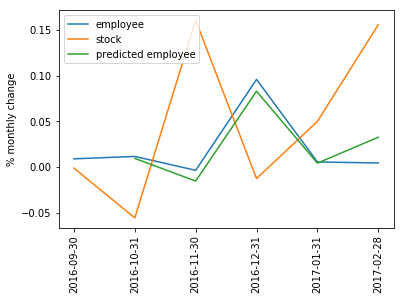

In [115]:
plt.plot(temp.percentemp)
plt.plot(temp.percentstock)
plt.plot(ypred)
plt.xticks(rotation='vertical')
plt.legend(['employee','stock', 'predicted employee'], loc='upper left')
plt.ylabel('% monthly change')
plt.show()

# Predicting percent change in stock price based on the change in fraction of employees from the previous month
Zoetis, a pharmaceutical company and the world's largest producer of medicine and vaccinations for pets and livestock, has the highest r^2 value (0.90) for predicting the stock price change next month based on the fraction of change in employee this month.

In [116]:
df = df.sort_values(by=['empredst'], ascending=False)
c = list(df.names)
df.head()

,names,stpredem,empredst
108,Zoetis,0.464715,0.903661
1284,Stitch Fix,0.199566,0.858533
1500,Sage Therapeutics,0.001665,0.762376
1472,YPF,0.127412,0.626803
1348,Grifols,0.001599,0.622746


In [117]:
temp = pd.read_csv('deltastem/' + c[0] + '.csv')
temp = temp.set_index('as_of_date')

In [118]:
# top company 
lr = LinearRegression()
x = temp.percentemp[:-1]
y = temp.percentstock[1:]
lr.fit(x.values.reshape([-1,1]), y.values.reshape([-1,1]))
ypred = lr.predict(x.values.reshape([-1,1]))
ypred = np.append([np.nan], ypred)

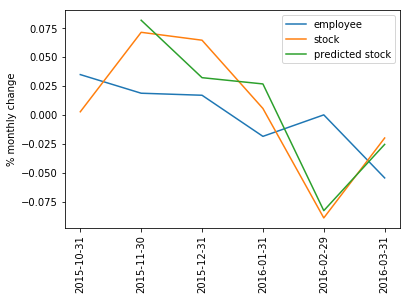

In [119]:
plt.plot(temp.percentemp)
plt.plot(temp.percentstock)
plt.plot(ypred)
plt.xticks(rotation='vertical')
plt.legend(['employee','stock', 'predicted stock'])
plt.ylabel('% monthly change')
plt.show()

# Correlation for different industries and their dependence on either change in stock price or change in employee to predict the other value next month
In order to do this, I filtered out the industries with minimum of 50 companies and compared the r^2 value for predicting change in employee based on last month's stock price difference and r^2 value for predicting change in stock price based on the change in the fraction of employees from the previous month

In [10]:
linkedin = pd.read_csv('temp_datalab_records_linkedin_company.csv', low_memory=False)

In [11]:
validcomp = df.names

In [12]:
# get the industry category for each company
empredst = {key:np.array([]) for key in linkedin.industry.unique()}
stpredem = {key:np.array([]) for key in linkedin.industry.unique()}
for c in validcomp:
    k = linkedin[linkedin.company_name == c].iloc[0].industry
    # grab r2 for prediction using employee data
    r2 = df[df.names == c].empredst
    x = empredst[k]
    x = np.append(x,r2.values)
    empredst[k] = x
    # grab r2 for prediction using stock data
    r2 = df[df.names == c].stpredem
    x = stpredem[k]
    x = np.append(x,r2.values)
    stpredem[k] = x

In [14]:
countDict = {}
for k,v in stpredem.items():
    if len(v)>0:
        countDict[k] = len(v)

In [15]:
counts = pd.Series(countDict)
counts = counts[counts>50]

In [135]:
k = list(counts.index)
k

['Pharmaceuticals',
 'Information Technology and Services',
 'Oil & Energy',
 'Financial Services',
 'Biotechnology',
 'Telecommunications',
 'Computer Software']

# Pharaceuticals

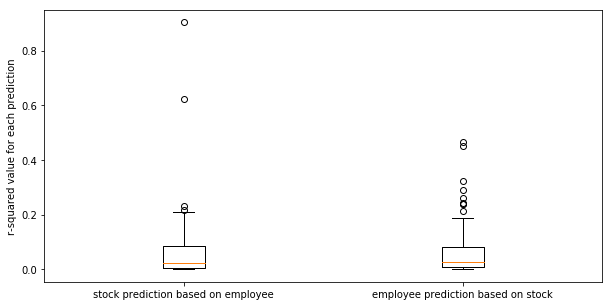

In [140]:
plt.subplots(figsize=(10,5))
plt.boxplot([empredst[k[0]],stpredem[k[0]]])
plt.xticks([1,2], ['stock prediction based on employee', 'employee prediction based on stock'])
plt.ylabel('r-squared value for each prediction')
plt.show()

# Information Technology and Services

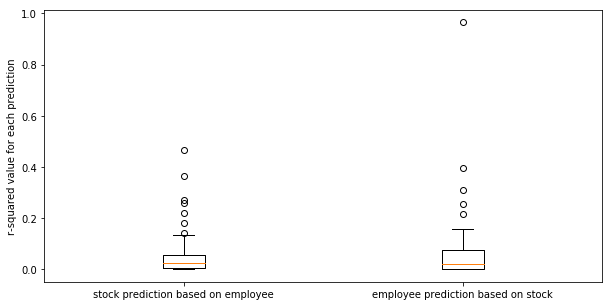

In [141]:
plt.subplots(figsize=(10,5))
plt.boxplot([empredst[k[1]],stpredem[k[1]]])
plt.xticks([1,2], ['stock prediction based on employee', 'employee prediction based on stock'])
plt.ylabel('r-squared value for each prediction')
plt.show()

# Oil & Energy

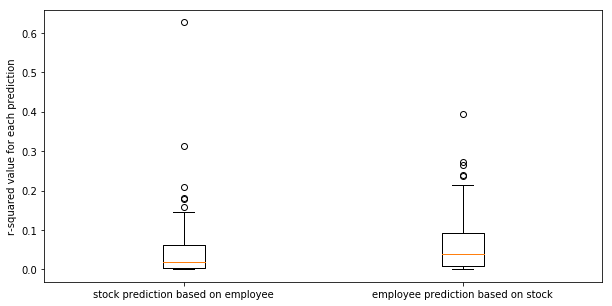

In [142]:
plt.subplots(figsize=(10,5))
plt.boxplot([empredst[k[2]],stpredem[k[2]]])
plt.xticks([1,2], ['stock prediction based on employee', 'employee prediction based on stock'])
plt.ylabel('r-squared value for each prediction')
plt.show()

# Financial Services

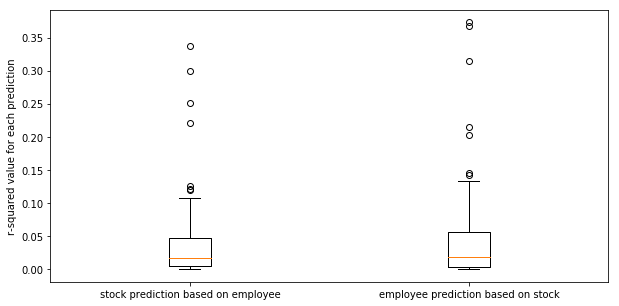

In [143]:
plt.subplots(figsize=(10,5))
plt.boxplot([empredst[k[3]],stpredem[k[3]]])
plt.xticks([1,2], ['stock prediction based on employee', 'employee prediction based on stock'])
plt.ylabel('r-squared value for each prediction')
plt.show()

# Biotechnology

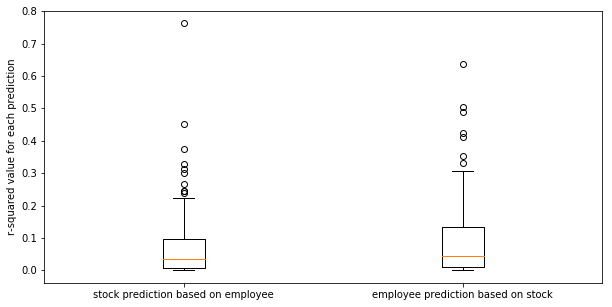

In [144]:
plt.subplots(figsize=(10,5))
plt.boxplot([empredst[k[4]],stpredem[k[4]]])
plt.xticks([1,2], ['stock prediction based on employee', 'employee prediction based on stock'])
plt.ylabel('r-squared value for each prediction')
plt.show()

# Telecommunications

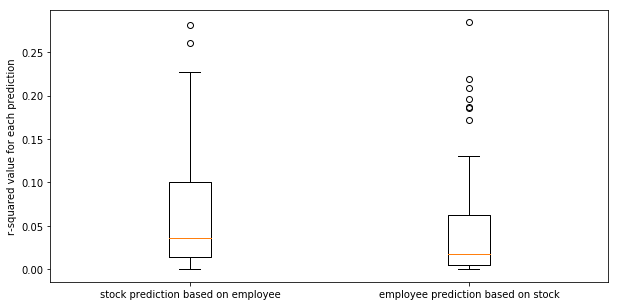

In [145]:
plt.subplots(figsize=(10,5))
plt.boxplot([empredst[k[5]],stpredem[k[5]]])
plt.xticks([1,2], ['stock prediction based on employee', 'employee prediction based on stock'])
plt.ylabel('r-squared value for each prediction')
plt.show()

# Computer Software

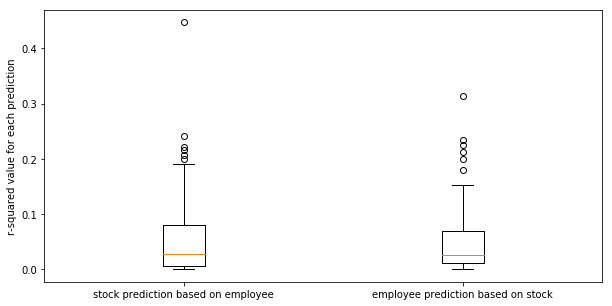

In [146]:
plt.subplots(figsize=(10,5))
plt.boxplot([empredst[k[6]],stpredem[k[6]]])
plt.xticks([1,2], ['stock prediction based on employee', 'employee prediction based on stock'])
plt.ylabel('r-squared value for each prediction')
plt.show()